In [179]:
import pandas as pd
from pickle import dump
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [180]:
y_train = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_train.csv")
y_test = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_test.csv")
X_train = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_train.csv")
X_test = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_test.csv")

In [181]:
random_seed = 24
np.random.seed(random_seed)

tree_classifier = DecisionTreeClassifier()

# Definir los parámetros que quieres ajustar
param_grid = {
    'max_depth': [None, 5, 10, 15],  # None significa sin límite
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10, 20, 50]
}

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los valores óptimos
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
model = DecisionTreeClassifier(max_depth = best_max_depth, 
                                   max_leaf_nodes = best_max_leaf_nodes,
                                   min_samples_split = best_min_samples_split,
                                   min_samples_leaf = best_min_samples_leaf,
                                   random_state = 24
                                   )

print(best_max_depth)
print(best_min_samples_split)
print(best_min_samples_leaf)
print(best_max_leaf_nodes)

None
2
1
10


In [182]:
accs = []
percents = [1, 0.8, 0.7, 0.6, 0.5]
for p in percents:
    selection_model = SelectKBest(f_classif, k = int(len(X_train.columns) * p))
    selection_model.fit(X_train, y_train)

    ix = selection_model.get_support()
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

    dump(selection_model, open(f"/workspaces/EDA_5_alfonso/models/selection_model{p}.pk", "wb"))
    # Definir el clasificador de árbol de decisión
    
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    

best_acc = accs.index(max(accs)) 
print(f'The best k for selection is {percents[best_acc]}.')
print(f'The best accuracy we get is {round(accs[best_acc],4)}.')
print(accs)

The best k for selection is 1.
The best accuracy we get is 0.7597.
[0.7597402597402597, 0.7597402597402597, 0.7077922077922078, 0.7077922077922078, 0.7077922077922078]


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

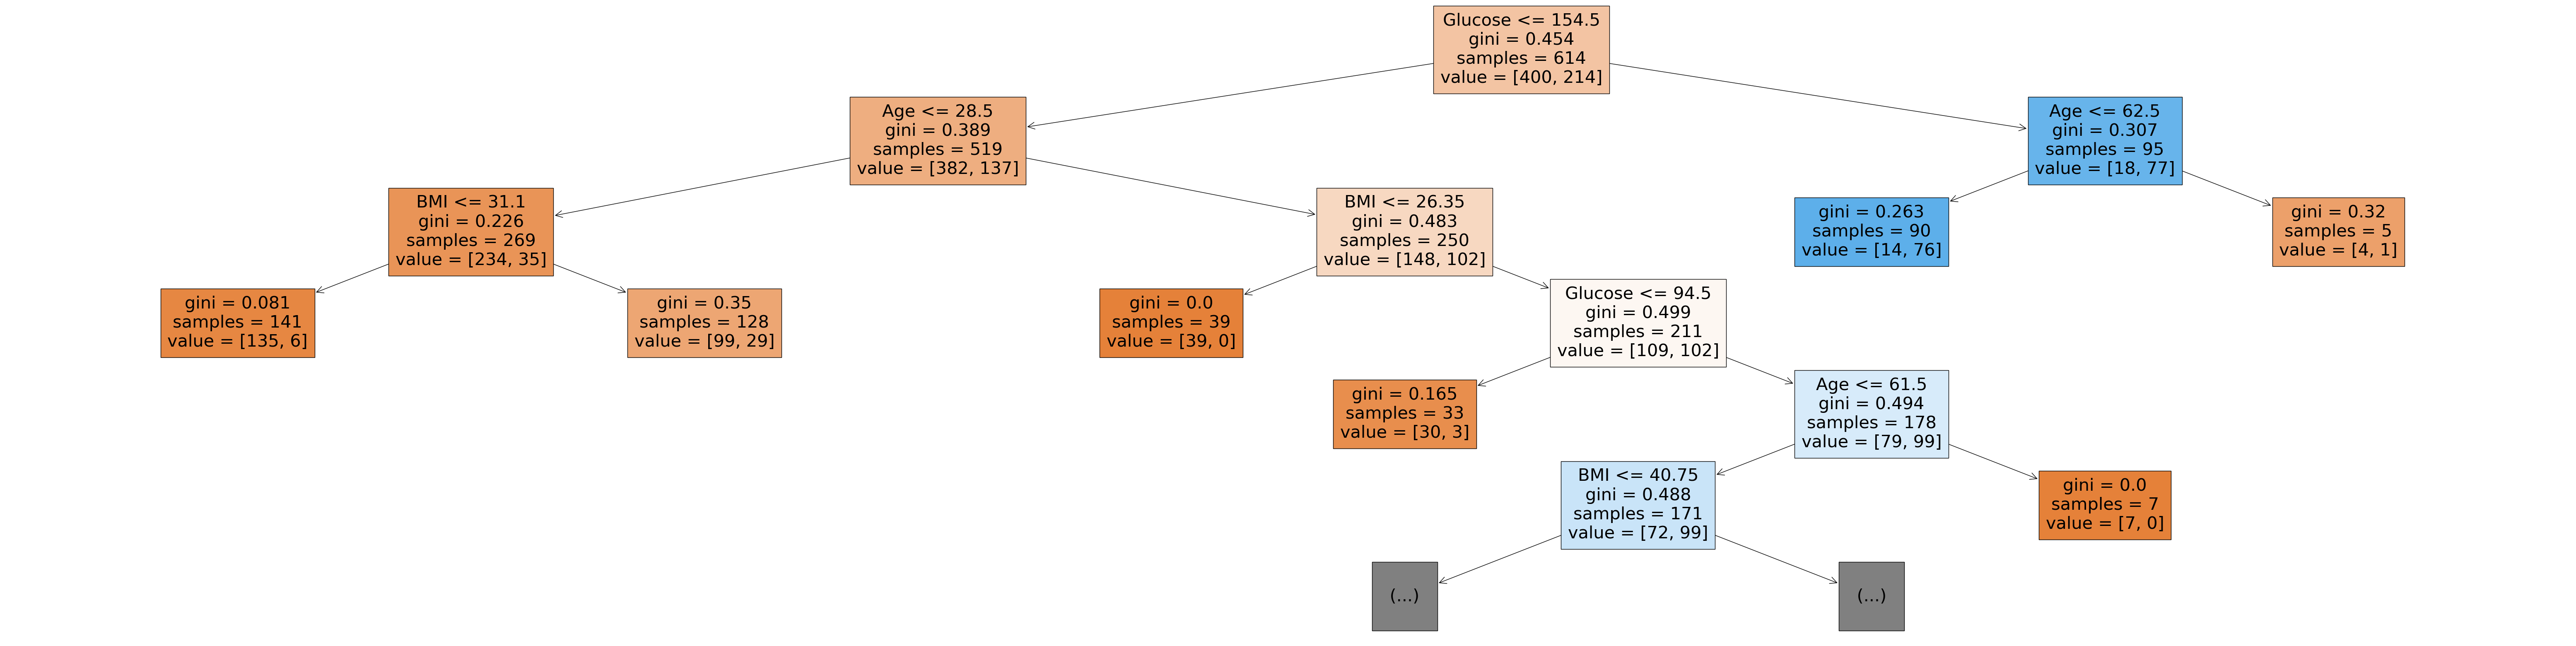

In [183]:
plt.figure(figsize =(80,20))

plot_tree(model, feature_names=X_train_sel.columns, max_depth=5, filled=True);
